# Plantillas desde SXS
Primero instalamos la libreria sxs `!pip install sxs -q`

In [58]:
!pip install sxs -q

In [59]:
import sxs # import sxs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.interpolate
from scipy.interpolate import interp1d, lagrange, CubicSpline, PchipInterpolator


%config InlineBackend.figure_format = 'retina'

In [60]:
sxs_bbh_0305 = sxs.load("SXS:BBH:0305")
w = sxs_bbh_0305.h

`w.metadata` los datos de los datos

In [61]:
print('tipo de objetos: '+w.metadata.object_types)

tipo de objetos: BHBH


In [62]:
t0 = w.metadata.reference_time # tiempo de referencia, al inicio hay "junk radiation"
print(f't0 = {t0}')

t0 = 1375.5


In [63]:
w.data # todos los multipolos

array([[-6.08756498e-02-1.03749838e-02j, -2.41767934e-03+1.33542406e-02j,
        -1.64394083e-03-3.75265786e-06j, ...,
        -2.95725132e-04+5.22237916e-04j,  2.78079796e-03+8.29943753e-04j,
         2.50602698e-04+1.68353454e-04j],
       [-6.40735522e-02-1.31167911e-02j, -3.48002319e-03+9.32264275e-03j,
        -5.03610157e-03-2.31076443e-06j, ...,
        -2.15370243e-04+1.19481812e-03j,  1.34881910e-03-4.17077557e-04j,
        -5.37740065e-05-7.94640111e-05j],
       [-6.65156314e-02-1.56924548e-02j, -2.53493403e-03+2.19838273e-03j,
        -8.05778633e-03-1.64970492e-06j, ...,
        -2.06140344e-06+1.43353933e-03j, -4.14711405e-04-1.28144381e-03j,
        -3.42189973e-04-2.59264884e-04j],
       ...,
       [ 4.79523837e-05+1.28127898e-04j, -8.09173930e-08+7.91554779e-08j,
         8.01785441e-02+1.89402223e-10j, ...,
         5.08097345e-08-3.34875639e-08j, -1.04881552e-09+1.11191059e-09j,
        -7.08001448e-08+3.99441588e-08j],
       [ 4.78265201e-05+1.28176042e-04j, -8.

In [64]:
ell, m = 2 , 2 # seleccionar el multipolo
i22 = w.index(ell, m) # seleccionar el indice del multipolo correspondiente
print(i22)
# guardar la onda 2 2 en w_2_2
w_2_2 = w[:, i22]
w_2_0 = w[:, 0]

4


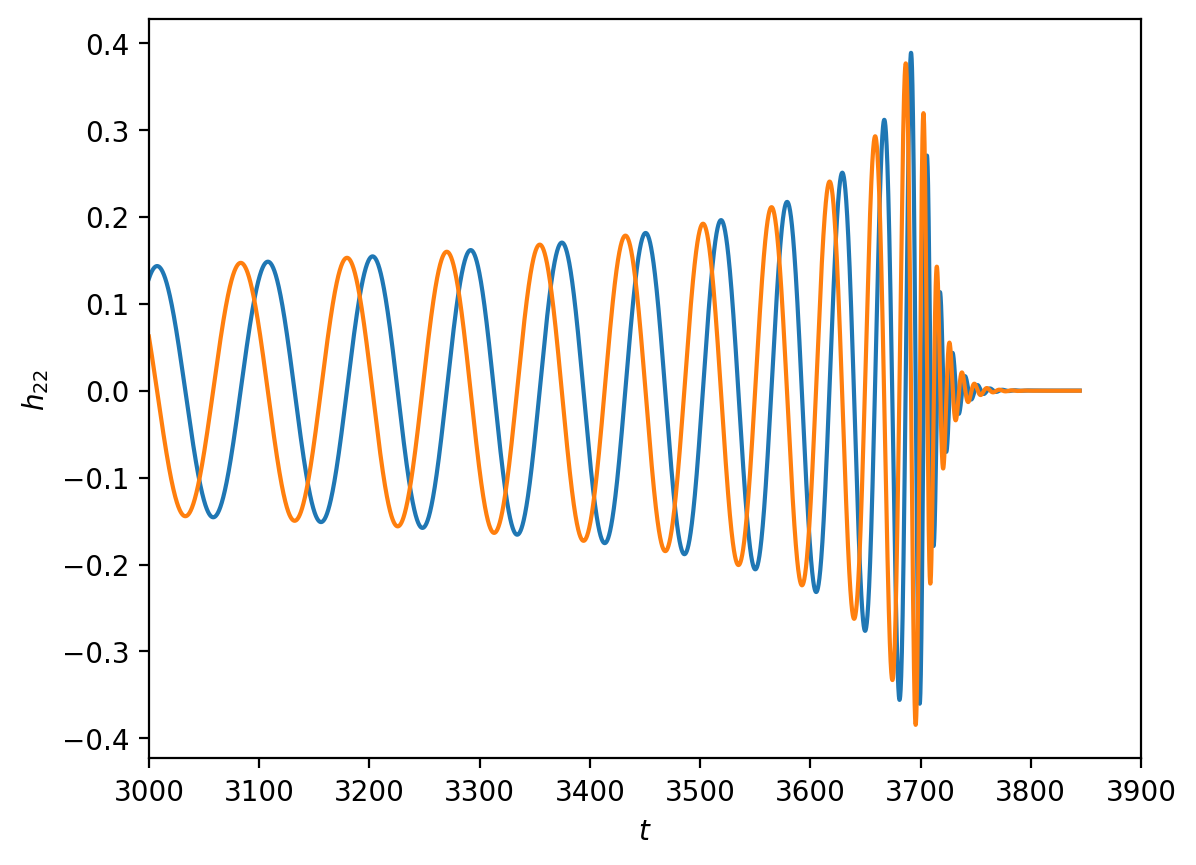

In [65]:
plt.figure()
plt.plot(w.t, np.real(w_2_2))
plt.plot(w.t, np.imag(w_2_2))
plt.xlim(3000,3900)
plt.xlabel(r'$t$')
plt.ylabel(r'$h_{22}$')
plt.show()

In [66]:
phi = np.angle(w_2_2)

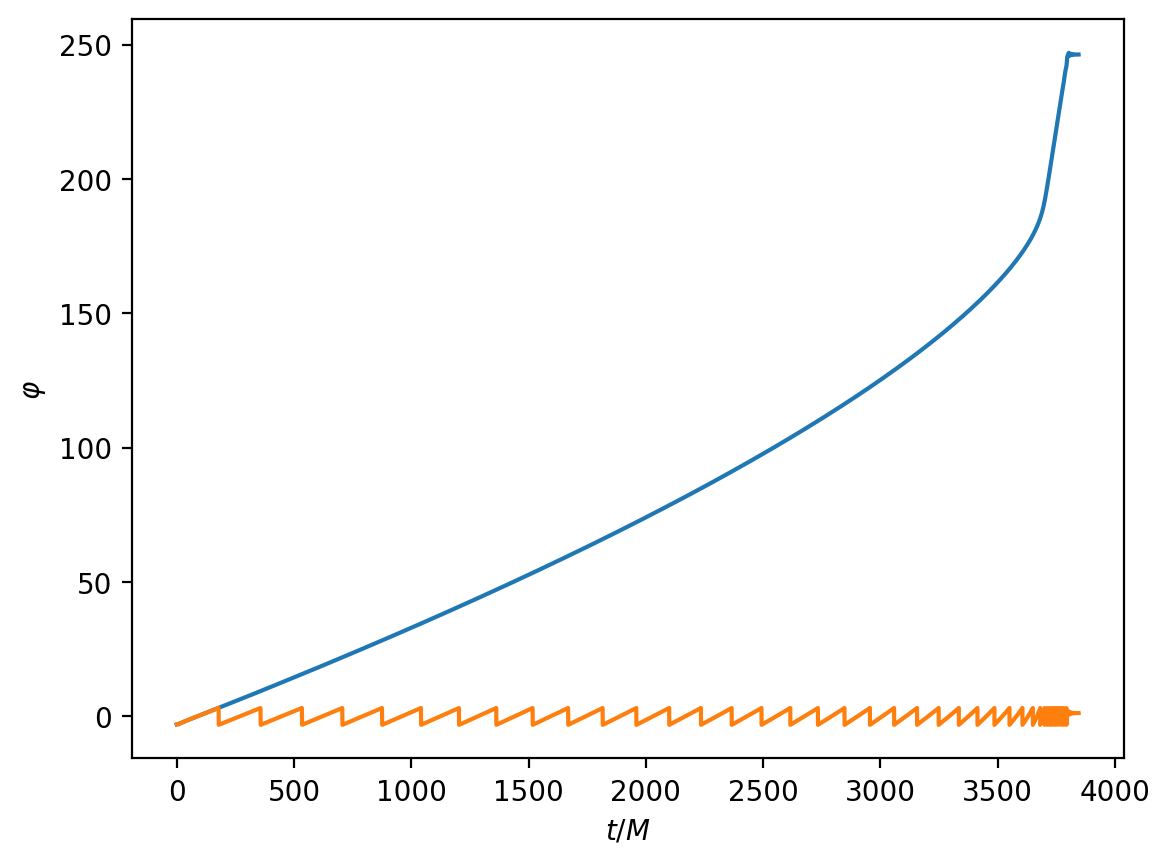

In [67]:
#plt.plot(w_2_2.t, -phi)
plt.plot(w_2_2.t, np.unwrap(-phi))
plt.plot(w_2_2.t, -phi)
plt.xlabel(r'$t/M$')
#plt.xlim(3500,)
#plt.ylim(200,)
plt.ylabel(r'$\varphi$')
plt.show()

In [68]:
sxs_bns_0001 = sxs.load("SXS:NSNS:0001")
w_bns = sxs_bns_0001.h

In [69]:
print('tipo de objetos: '+w_bns.metadata.object_types)

tipo de objetos: NSNS


In [70]:
w_bns.metadata.reference_time

392

I.Describir el sistema físico: masas, espín, que clase de objetos son.


II.Describir como se seleccionan los datos para estudiar la fase de las ondas, fase vs tiempo\
  A. Cuántos datos hay\
  B. Máximo y mínimos.\
  C. Paso constante?\
  D.Cómo responden estas preguntas con python.\

III.Realizar las interpolaciones:\
A.Lagrange (utilizar 10-20 puntos)\
B.Spline cúbico (diferentes condiciones de frontera)\
C.PCHIP\
IV.Comparar gráficamente las interpolaciones

V.Crear grupo de entrenamiento y grupo de prueba. Cómo crearon cada grupo.

VI.Graficar los errores de cada metodo SE y AE. Calcular MSE y MAE.

VII.Cuál es el mejor método?

In [71]:
import sxs

sim = sxs.load("SXS:BBH:0305")
meta = sim.metadata

# Ver todas las claves disponibles en los metadatos
print(meta.keys())


odict_keys(['simulation_name', 'keywords', 'alternative_names', 'metadata_format_revision', 'metadata_content_revision', 'internal_minor_version', 'internal_changelog', 'citation_dois', 'initial_separation', 'initial_orbital_frequency', 'initial_adot', 'initial_ADM_energy', 'initial_ADM_linear_momentum', 'initial_ADM_angular_momentum', 'initial_dimensionless_spin1', 'initial_dimensionless_spin2', 'initial_data_type', 'initial_mass1', 'initial_mass2', 'object1', 'object2', 'initial_position1', 'initial_position2', 't_relaxed_algorithm', 'relaxation_time', 'reference_time', 'reference_dimensionless_spin1', 'reference_mass1', 'reference_dimensionless_spin2', 'reference_mass2', 'reference_position1', 'reference_position2', 'reference_orbital_frequency', 'common_horizon_time', 'number_of_orbits_from_start', 'number_of_orbits_from_reference_time', 'reference_eccentricity', 'reference_mean_anomaly', 'remnant_mass', 'remnant_dimensionless_spin', 'remnant_velocity', 'spec_revisions', 'spells_re

In [72]:
# Clase de objetos
print("Clase de objetos:", meta["object_types"])

# Masas iniciales (referidas a un tiempo de referencia)
print("Masa agujero negro 1:", meta["reference_mass1"])
print("Masa agujero negro 2:", meta["reference_mass2"])
print("Razón de masas q = m1/m2:", meta["reference_mass_ratio"])

# Espines iniciales
spin1_init = meta["initial_dimensionless_spin1"]
spin2_init = meta["initial_dimensionless_spin2"]

print("Espín inicial BH1:", spin1_init)
print("Espín inicial BH2:", spin2_init)


# Agujero negro final (remnant)
print("Masa final:", meta["remnant_mass"])
print("Espín final (adimensional):", meta["remnant_dimensionless_spin"])


Clase de objetos: BHBH
Masa agujero negro 1: 0.5498023657759457
Masa agujero negro 2: 0.4502139397435628
Razón de masas q = m1/m2: 1.2212024489714988
Espín inicial BH1: [3.2772e-12, -9.165e-13, 0.3300000041229183]
Espín inicial BH2: [-2.778e-13, -1.44e-13, -0.4400000049306194]
Masa final: 0.9520329397043087
Espín final (adimensional): [5.253958683511938e-08, -2.4567336559285058e-08, 0.6920851868170271]


In [73]:
#Segundo punto
len(w_2_2)
len(w_2_2)
print("Número total de datos:", len(w_2_0))

Número total de datos: 13746


In [74]:
#B
phase = np.unwrap(-np.angle(w_2_2))

t_min, t_max = w.t.min(), w.t.max()
phase_min, phase_max = phase.min(), phase.max()

print("Tiempo mínimo:", t_min)
print("Tiempo máximo:", t_max)
print("Fase mínima:", phase_min)
print("Fase máxima:", phase_max)

Tiempo mínimo: 0.4802217393588517
Tiempo máximo: 3844.4210478262476
Fase mínima: -2.972864350400939
Fase máxima: 246.89628047391062


In [75]:
#C
dt = np.diff(w_2_2.t)          # Diferencias entre tiempos consecutivos
is_constant = np.allclose(dt, dt[0])
dt_mean = np.mean(dt)
print("¿El paso de tiempo es constante?:", is_constant)
print("Paso de tiempo medio:", dt_mean)

¿El paso de tiempo es constante?: False
Paso de tiempo medio: 0.2796610277254921


Polinomio de Lagrange:
           14             13             12             11
3.374e-41 x  - 1.202e-36 x  + 1.978e-32 x  - 1.989e-28 x 
              10            9             8             7             6
 + 1.367e-24 x  - 6.79e-21 x + 2.512e-17 x - 7.033e-14 x + 1.497e-10 x
              5             4          3         2
 - 2.411e-07 x + 0.0002891 x - 0.2503 x + 147.8 x - 5.332e+04 x + 8.859e+06


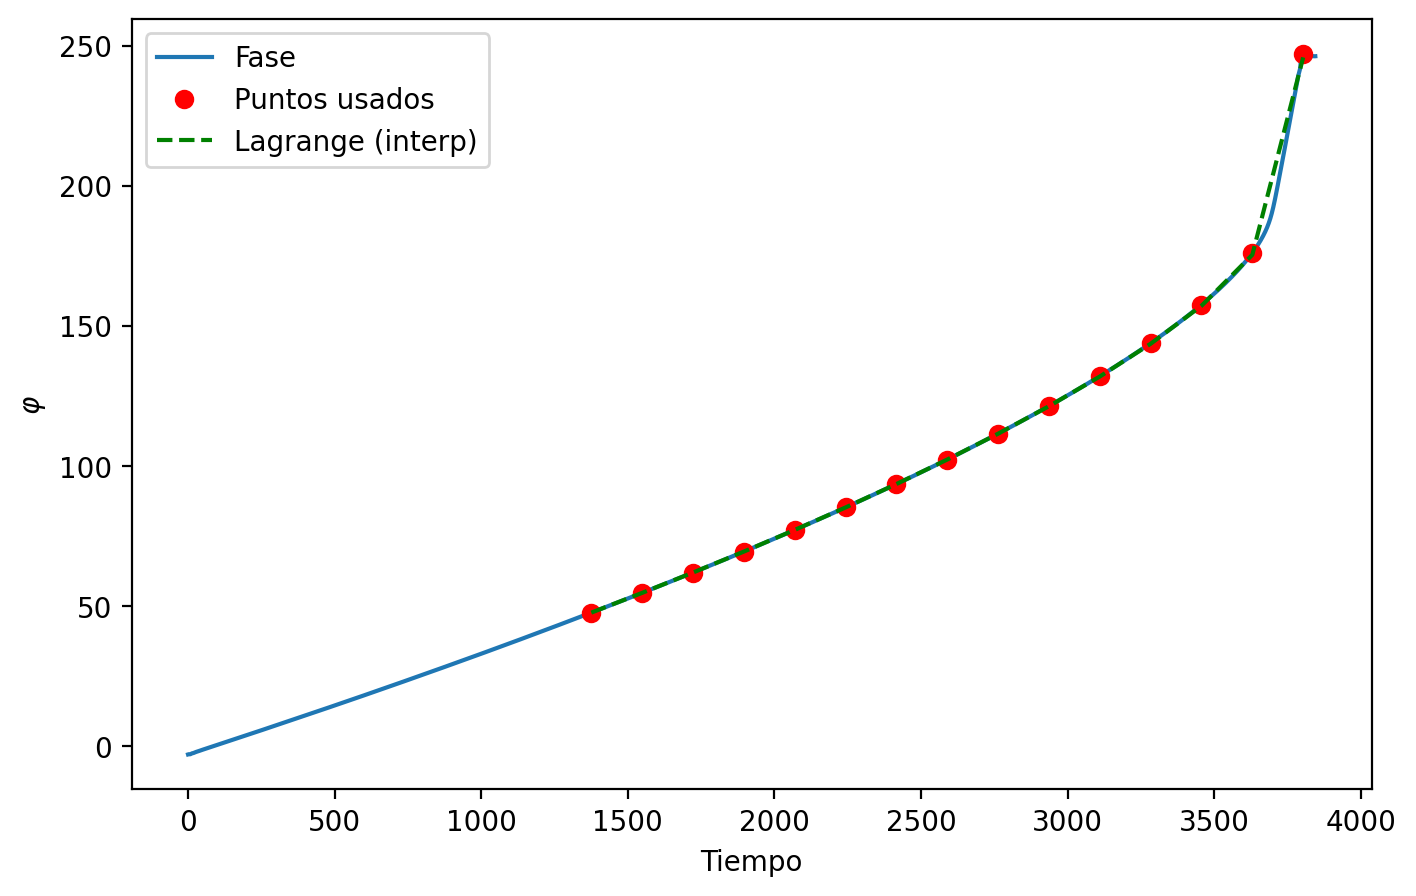

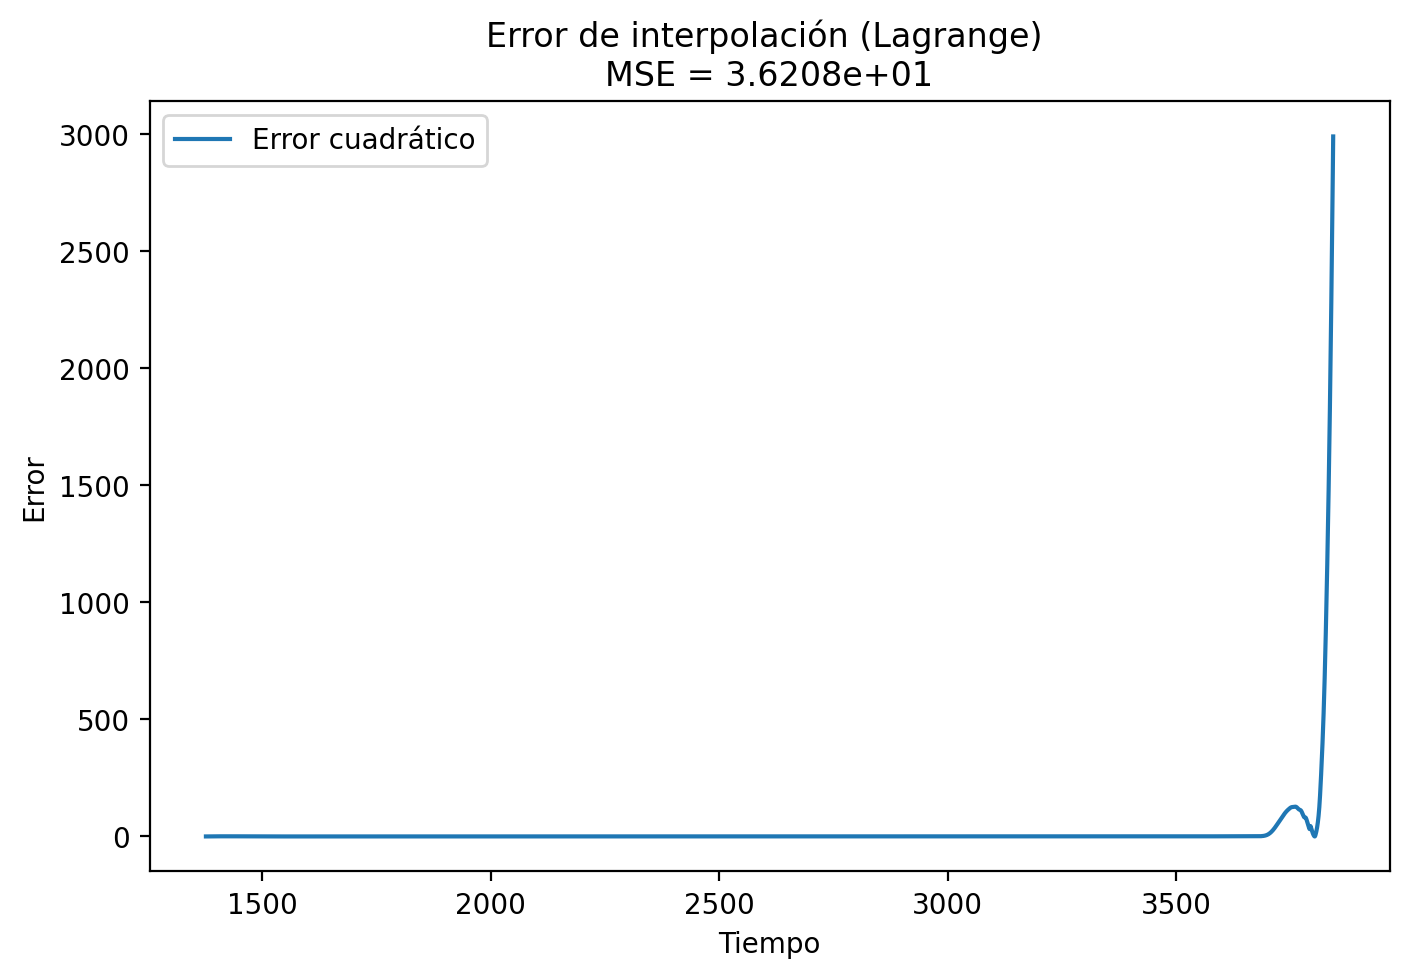

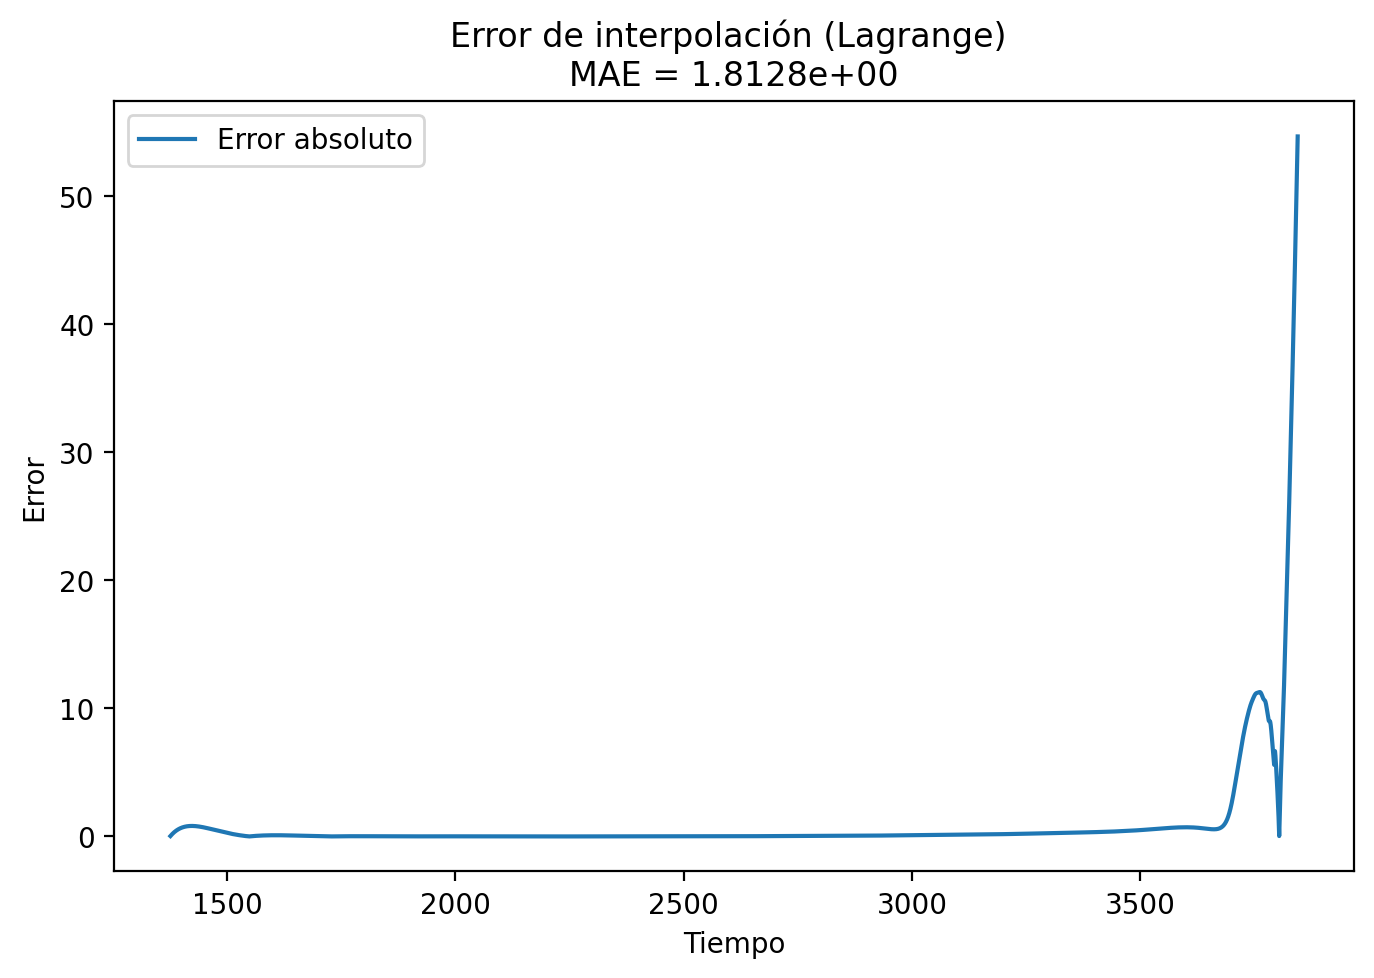

In [83]:
# Lagrange

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
from sklearn.metrics import mean_squared_error, mean_absolute_error

time= w.t
phi_unwrapped = np.unwrap(-phi)
# Asegurarse de que tengan misma longitud
assert len(phi_unwrapped == len(time))
#rango de la interpolacion
t0 = w.metadata.reference_time  # tiempo de referencia
t_min = np.argmin(np.abs(time - t0)) # índice más cercano a t0
i_max = np.argmax(np.abs(phi_unwrapped)) # índice de la fase máxima
#puntos de entrenamiento
N = 15
t = np.linspace(time[t_min], time[i_max], N) #indice de los elementos del grupo de entrenamiento
fase = np.interp(t, time, phi_unwrapped)
#puntos de prueba
t_test_full = time[time >= t0]
t_test = np.setdiff1d(t_test_full, t) #Quitar los tiempos de entrenamiento
fase_test = np.interp(t_test, time, phi_unwrapped)
# interpolación de Lagrange
polinomio_lagrange = lagrange(t, fase)
print("Polinomio de Lagrange:")
print(polinomio_lagrange)

# Graficar comparación
plt.figure(figsize=(8,5))
plt.plot(w_2_2.t, np.unwrap(-phi), label="Fase")
plt.plot(t, fase, 'ro', label="Puntos usados")
plt.plot(t, polinomio_lagrange(t), 'g--', label="Lagrange (interp)")
plt.ylabel(r'$\varphi$')
plt.xlabel("Tiempo")
plt.legend()
plt.show()

# Errores
fase_pred = polinomio_lagrange(t_test)
SE = (fase_test - fase_pred )**2
AE = np.abs(fase_test - fase_pred)
MSE = mean_squared_error(fase_test, fase_pred)
MAE = mean_absolute_error(fase_test, fase_pred)

plt.figure(figsize=(8,5))
plt.plot(t_test, SE, label="Error cuadrático")
plt.xlabel("Tiempo")
plt.ylabel("Error")
plt.title(f'Error de interpolación (Lagrange) \nMSE = {MSE:.4e}')
plt.legend()
plt.show()

plt.figure(figsize=(8,5))
plt.plot(t_test, AE, label="Error absoluto")
plt.xlabel("Tiempo")
plt.ylabel("Error")
plt.title(f'Error de interpolación (Lagrange) \nMAE = {MAE:.4e}')
plt.legend()

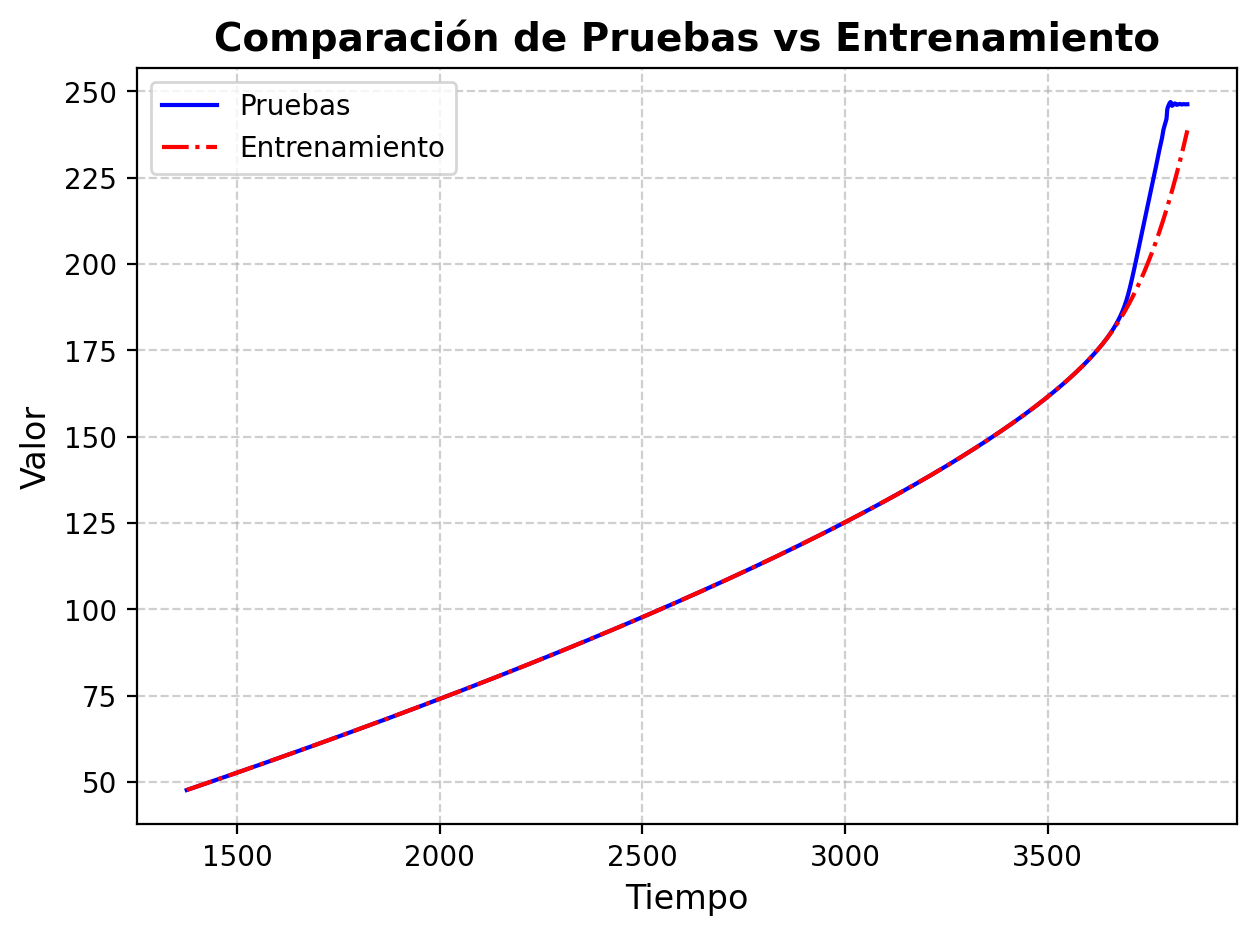

In [84]:
#III comparacion de prueba y entrenamiento

t_p = w.t[w.t >= 1375.5]
y_p = phase[w.t >= 1375.5]

#Definimos el grupo de entrenamiento

t_entrenamiento = t_p[:int(len(t_p)*0.8)]
y_entrenamiento = y_p[:int(len(t_p)*0.8)]

#Ahora definimos el grupo de pruebas

t_pruebas = np.setdiff1d(t_p, t_entrenamiento)
y_pruebas = np.setdiff1d(y_p, y_entrenamiento)


spline_n = CubicSpline(t_entrenamiento,y_entrenamiento)
y_New = spline_n(t_p)

# Gráficas
plt.plot(t_p, y_p, '-', color='blue', label='Pruebas')
plt.plot(t_p, y_New, '-.', color='red', label='Entrenamiento')

# Decoración
plt.title("Comparación de Pruebas vs Entrenamiento", fontsize=14, fontweight='bold')
plt.xlabel("Tiempo", fontsize=12)
plt.ylabel("Valor", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Mostrar
plt.tight_layout()
plt.show()

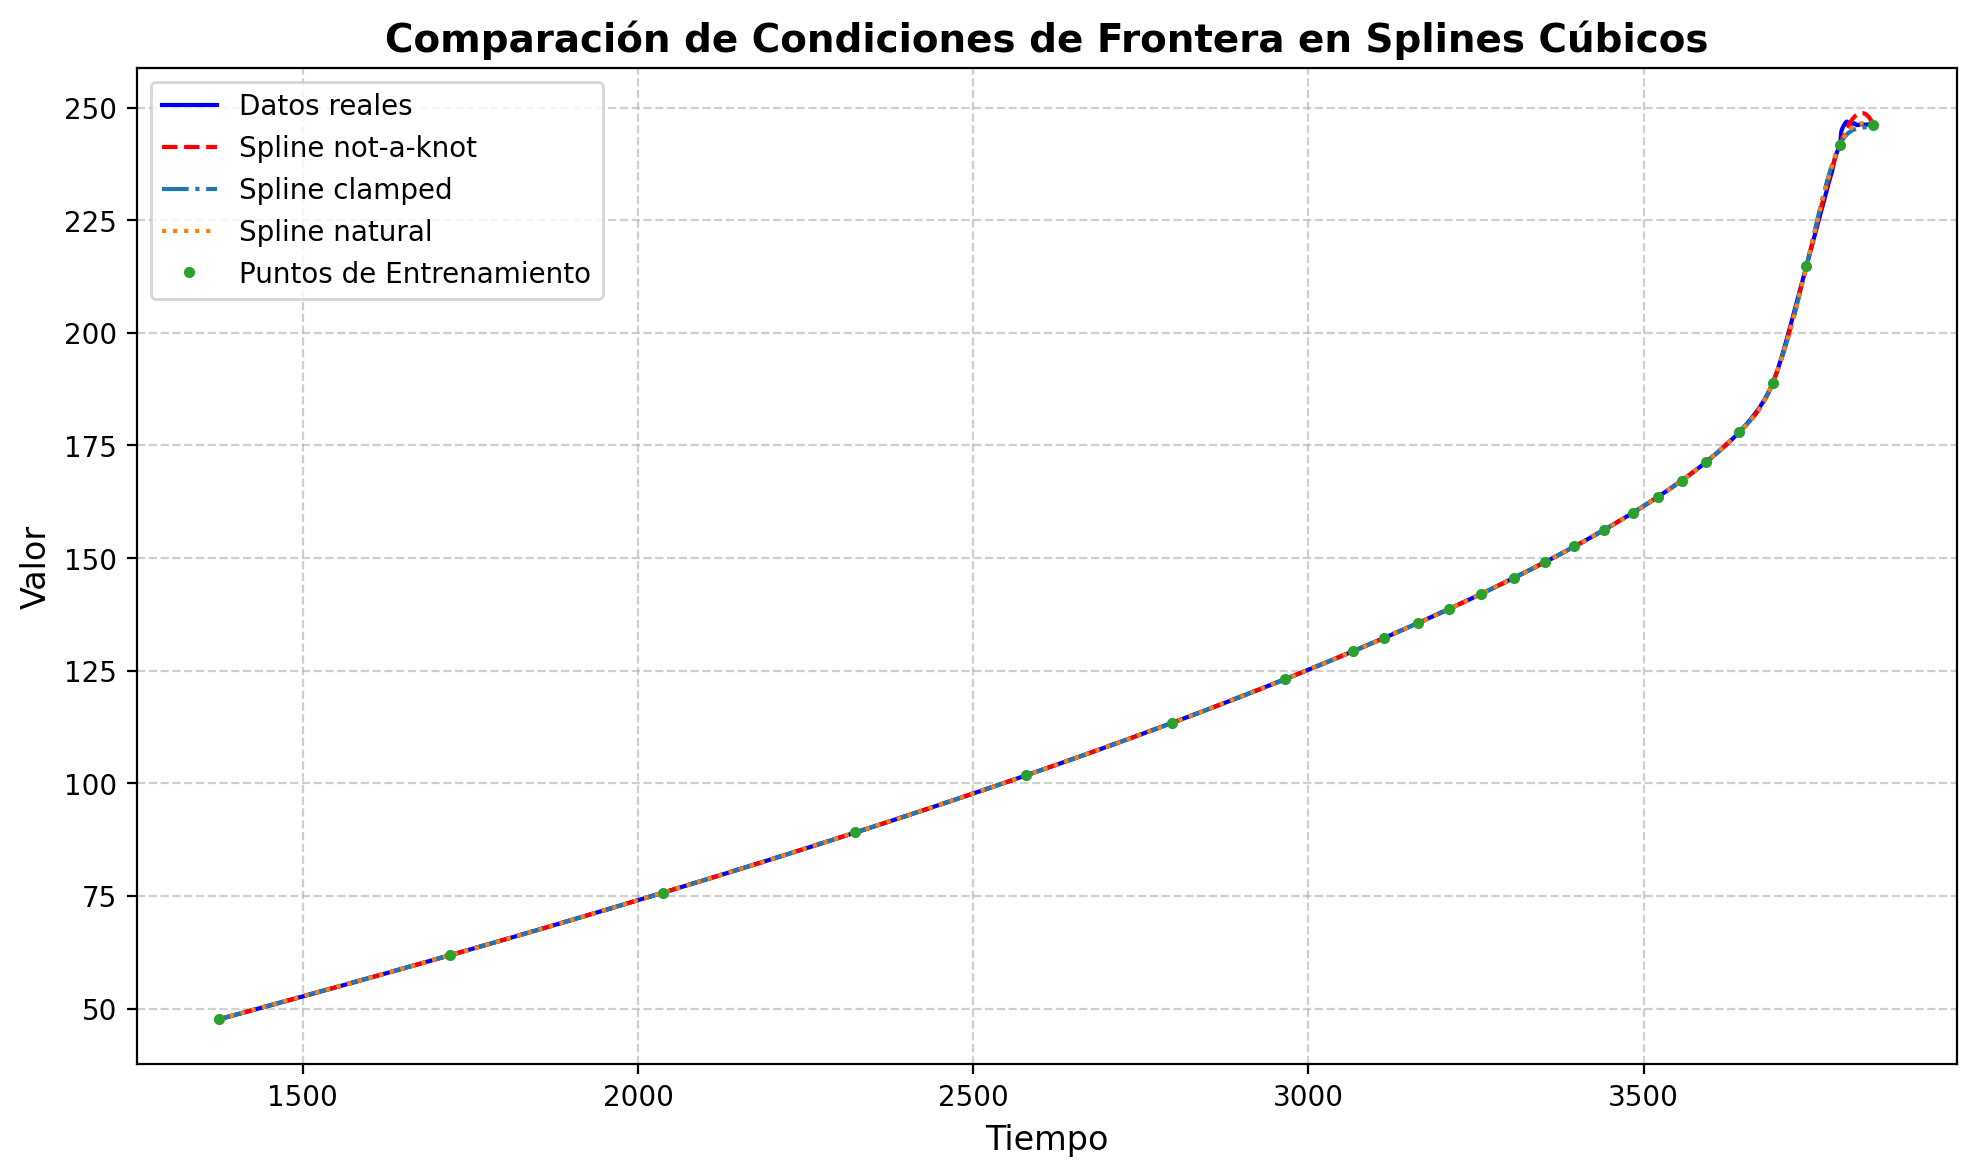

In [85]:
# III Spline
t_p = w.t[w.t >= 1375.5]
y_p = phase[w.t >= 1375.5]


# Definimos el grupo de entrenamiento
t_entrenamiento = t_p[::500]
y_entrenamiento = y_p[::500]

# Ahora definimos el grupo de pruebas

t_pruebas = np.setdiff1d(t_p, t_entrenamiento)
y_pruebas = np.setdiff1d(y_p, y_entrenamiento)


# Condiciones de Frontera

# 1) Condición "not-a-knot" (por defecto)

spline_notaknot = CubicSpline(t_entrenamiento, y_entrenamiento, bc_type='not-a-knot')
y_notaknot = spline_notaknot(t_p)

# 2) Condición "clamped" (especificando la derivada en los extremos)
#   Aquí se supone que conoces o aproximas la pendiente en los extremos
dy0 = abs((y_entrenamiento[1] - y_entrenamiento[0]) / (t_entrenamiento[1] - t_entrenamiento[0]))
dyN = abs((y_entrenamiento[-1] - y_entrenamiento[-2]) / (t_entrenamiento[-1] - t_entrenamiento[-2]))
spline_clamped = CubicSpline(t_entrenamiento, y_entrenamiento, bc_type=((1, dy0), (1, dyN)))
y_clamped = spline_clamped(t_p)

# 3) Condición "natural" (segunda derivada nula en extremos)
spline_natural = CubicSpline(t_entrenamiento, y_entrenamiento, bc_type='natural')
y_natural = spline_natural(t_p)

# Gráficas
plt.figure(figsize=(10,6))
plt.plot(t_p, y_p, '-', color='blue', label='Datos reales')
plt.plot(t_p, y_notaknot, '--',color='red', label='Spline not-a-knot')
plt.plot(t_p, y_clamped, '-.', label='Spline clamped')
plt.plot(t_p, y_natural, ':', label='Spline natural')
plt.plot(t_entrenamiento,y_entrenamiento,'.',label='Puntos de Entrenamiento')

# Decoración
plt.title("Comparación de Condiciones de Frontera en Splines Cúbicos", fontsize=14, fontweight='bold')
plt.xlabel("Tiempo", fontsize=12)
plt.ylabel("Valor", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

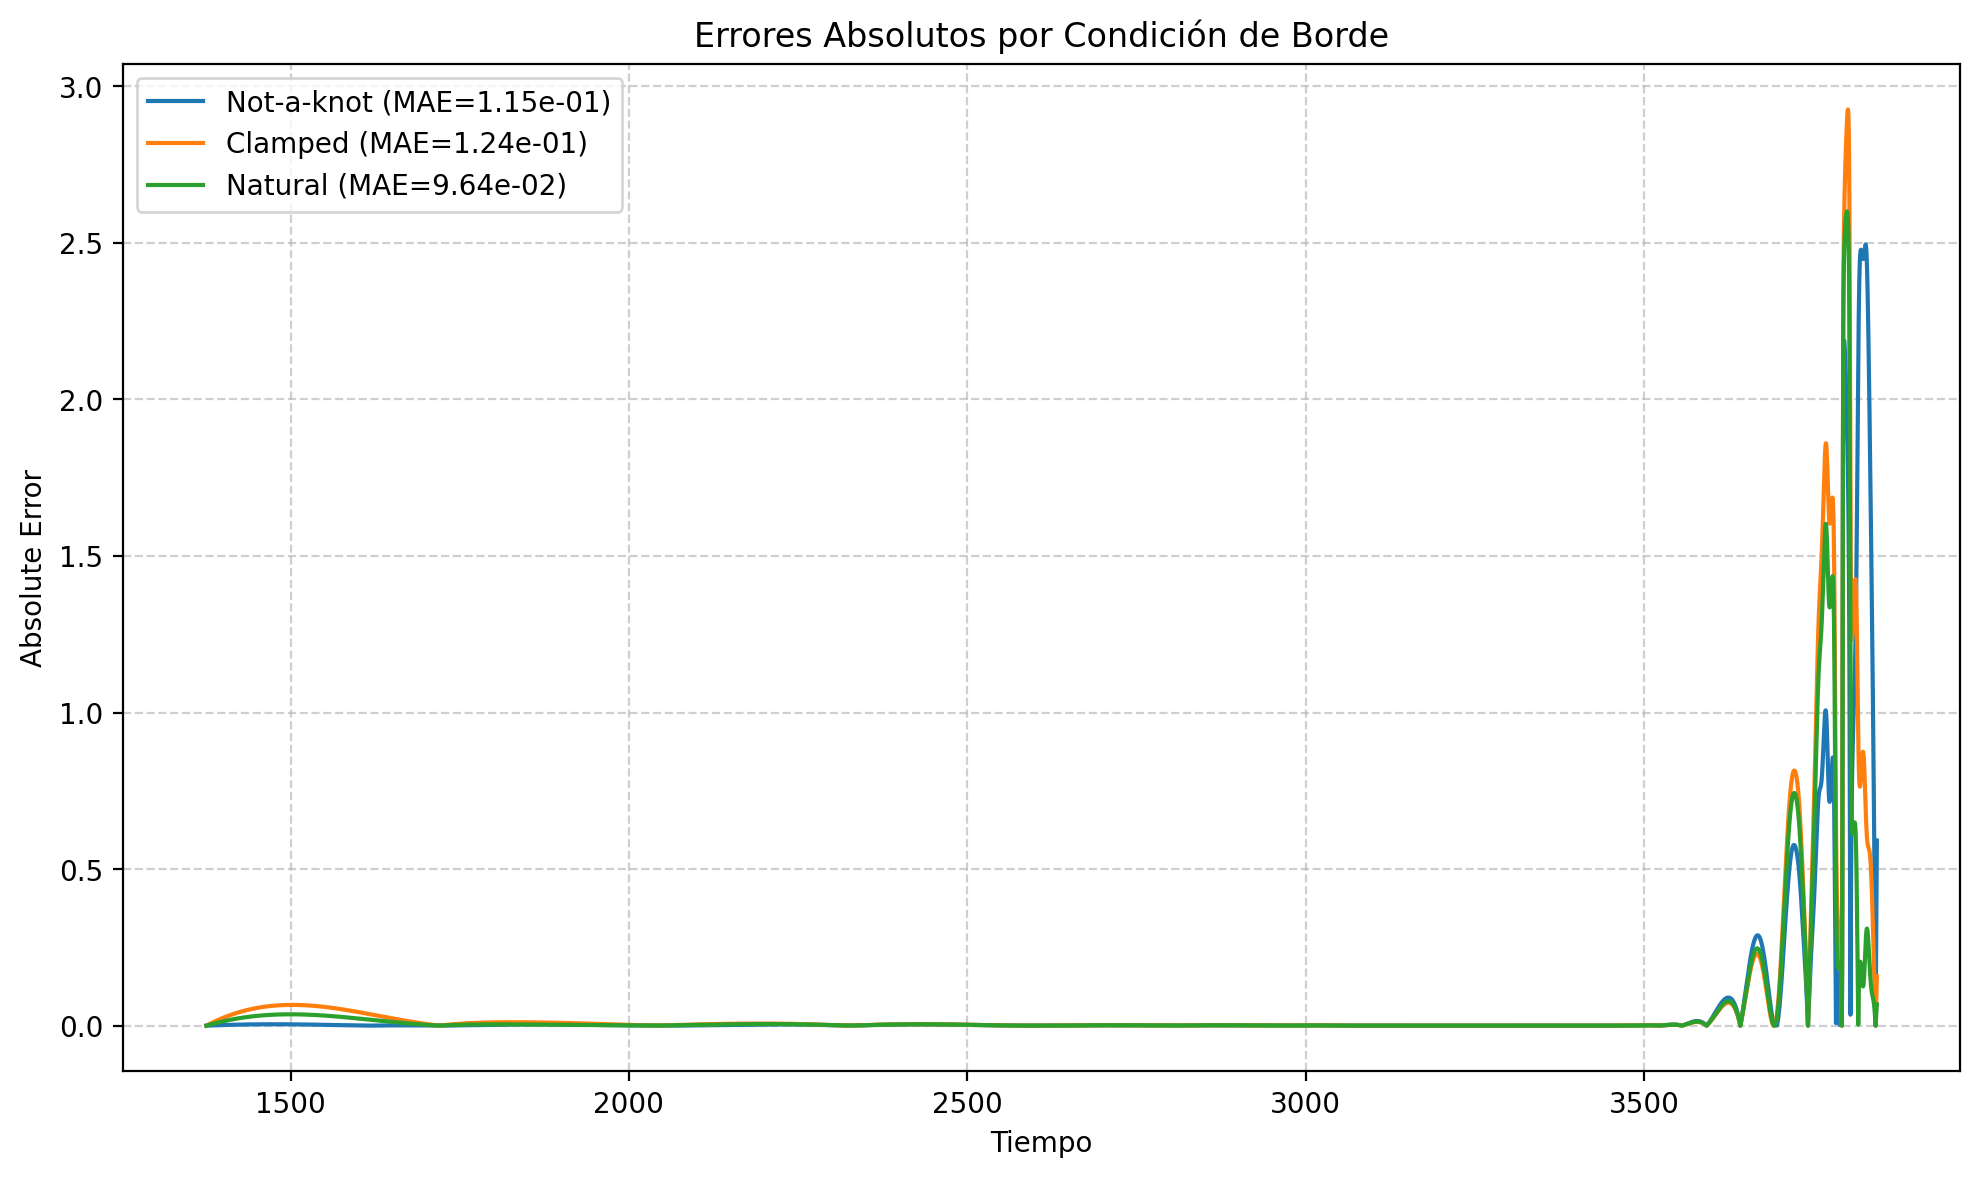

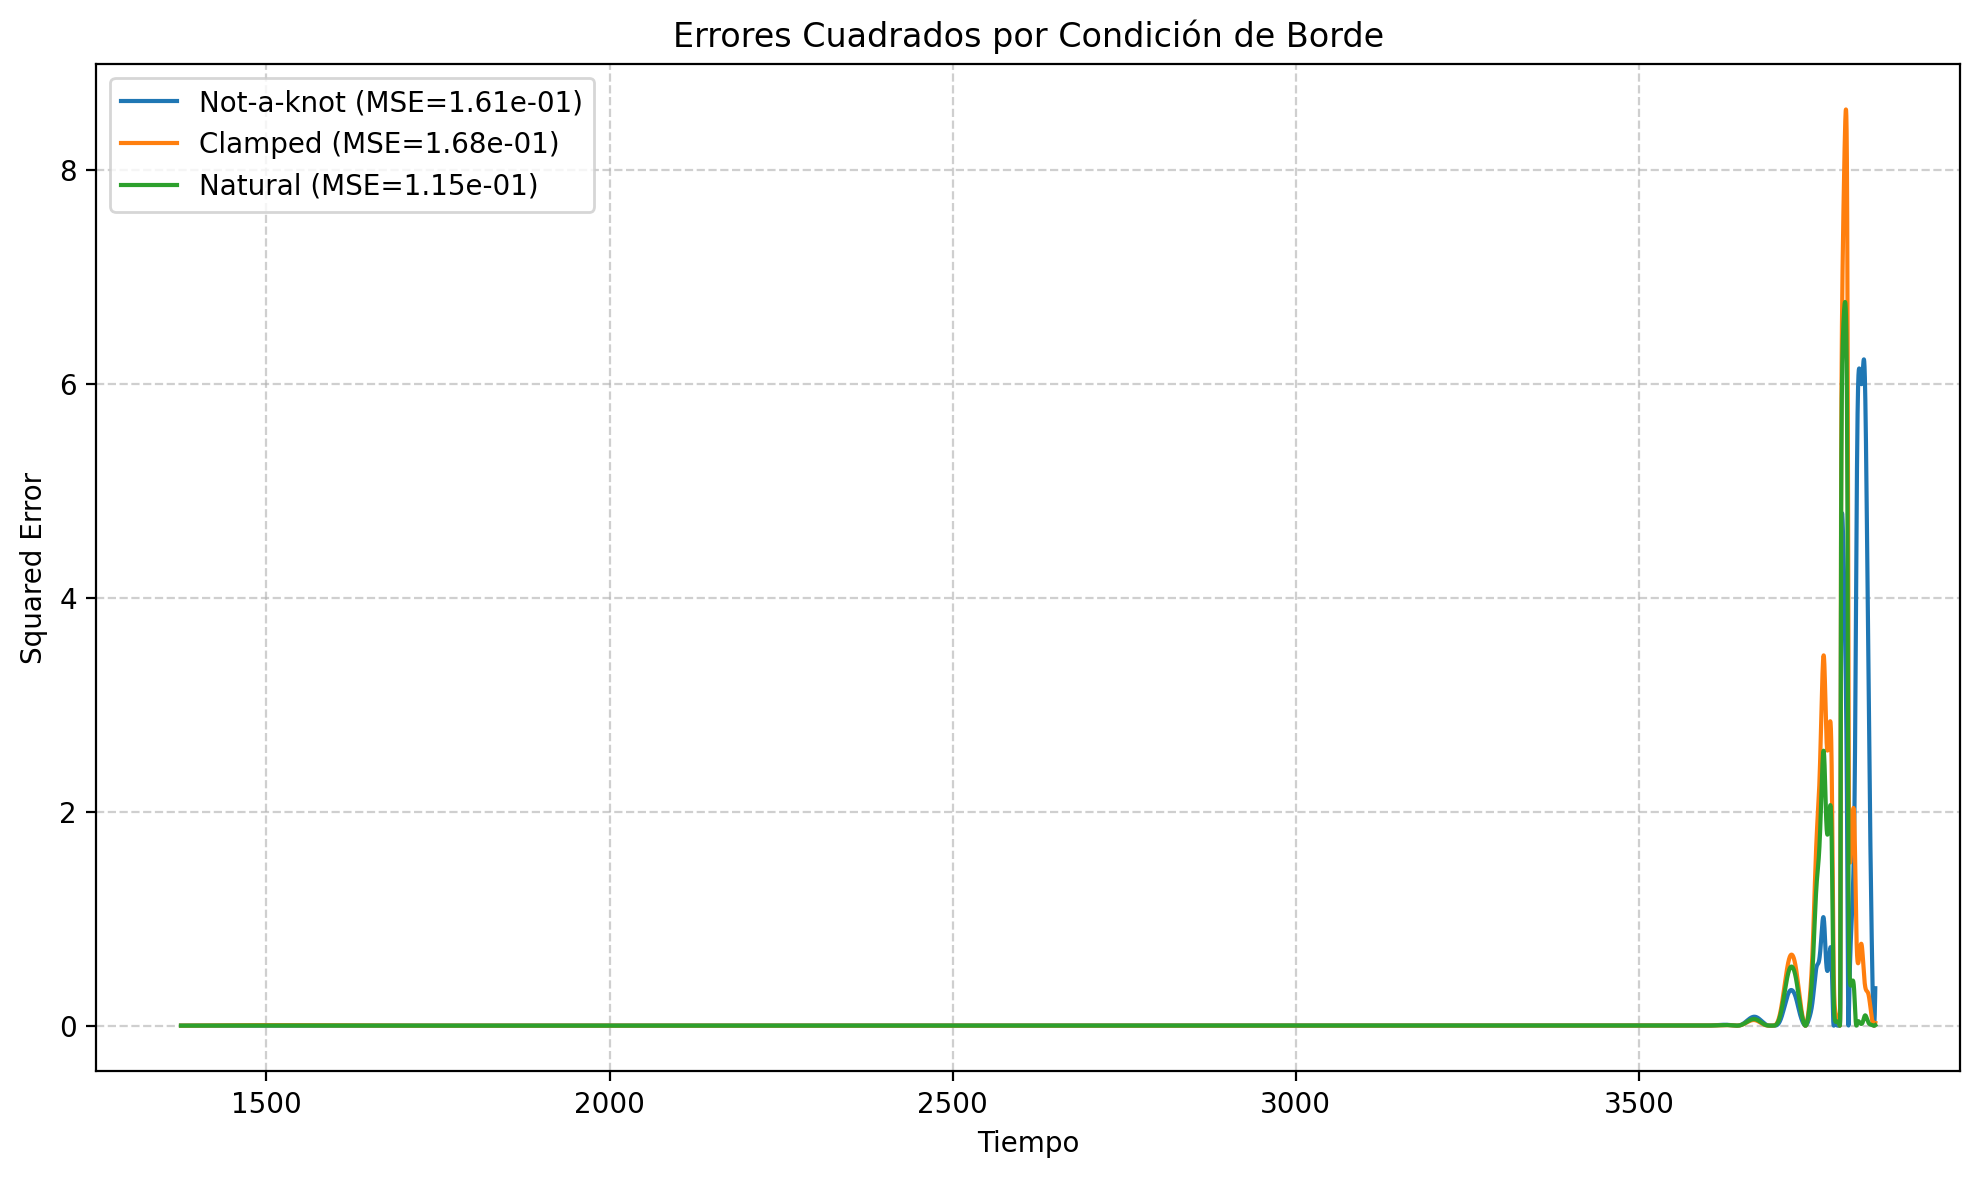

In [86]:
#grafica de error los spline

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# asegurar que los arreglos tengan el mismo tamaño
min_len = min(len(y_p), len(y_notaknot), len(y_clamped), len(y_natural))

y_p_clipped = y_p[:min_len]
y_notaknot_clipped = y_notaknot[:min_len]
y_clamped_clipped = y_clamped[:min_len]
y_natural_clipped = y_natural[:min_len]
t_p_clipped = t_p[:min_len]


# Diccionario de errores
errors = {
    "Not-a-knot": {
        "abs": np.abs(y_p_clipped - y_notaknot_clipped),
        "sq": (y_p_clipped - y_notaknot_clipped) ** 2,
        "MAE": mean_absolute_error(y_p_clipped, y_notaknot_clipped),
        "MSE": mean_squared_error(y_p_clipped, y_notaknot_clipped)
    },
    "Clamped": {
        "abs": np.abs(y_p_clipped - y_clamped_clipped),
        "sq": (y_p_clipped - y_clamped_clipped) ** 2,
        "MAE": mean_absolute_error(y_p_clipped, y_clamped_clipped),
        "MSE": mean_squared_error(y_p_clipped, y_clamped_clipped)
    },
    "Natural": {
        "abs": np.abs(y_p_clipped - y_natural_clipped),
        "sq": (y_p_clipped - y_natural_clipped) ** 2,
        "MAE": mean_absolute_error(y_p_clipped, y_natural_clipped),
        "MSE": mean_squared_error(y_p_clipped, y_natural_clipped)
    }
}

# --- Gráfica de errores absolutos ---
plt.figure(figsize=(10,6))
for name, e in errors.items():
    plt.plot(t_p_clipped, e["abs"], label=f"{name} (MAE={e['MAE']:.2e})")
plt.title("Errores Absolutos por Condición de Borde")
plt.xlabel("Tiempo")
plt.ylabel("Absolute Error")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

# --- Gráfica de errores cuadrados ---
plt.figure(figsize=(10,6))
for name, e in errors.items():
    plt.plot(t_p_clipped, e["sq"], label=f"{name} (MSE={e['MSE']:.2e})")
plt.title("Errores Cuadrados por Condición de Borde")
plt.xlabel("Tiempo")
plt.ylabel("Squared Error")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

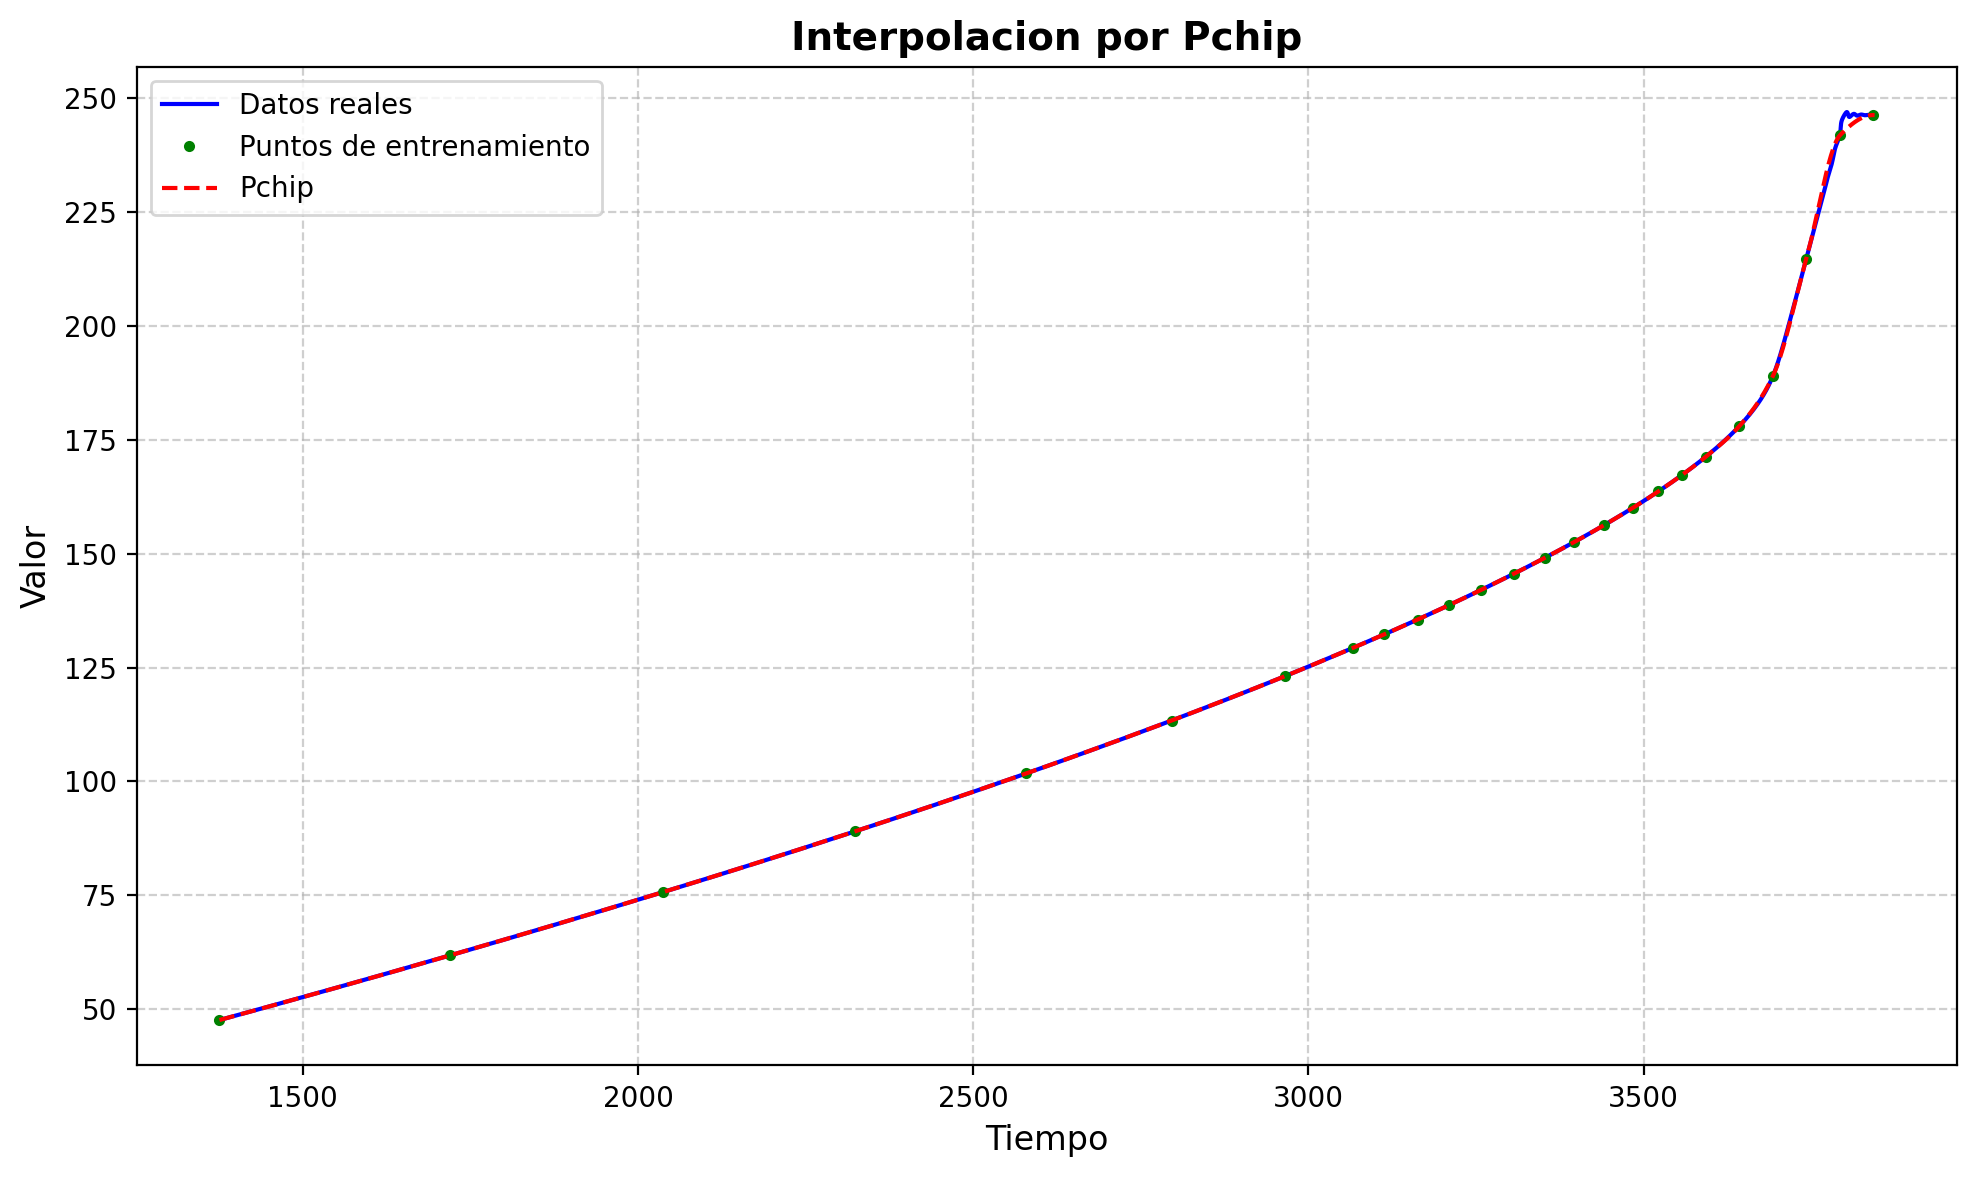

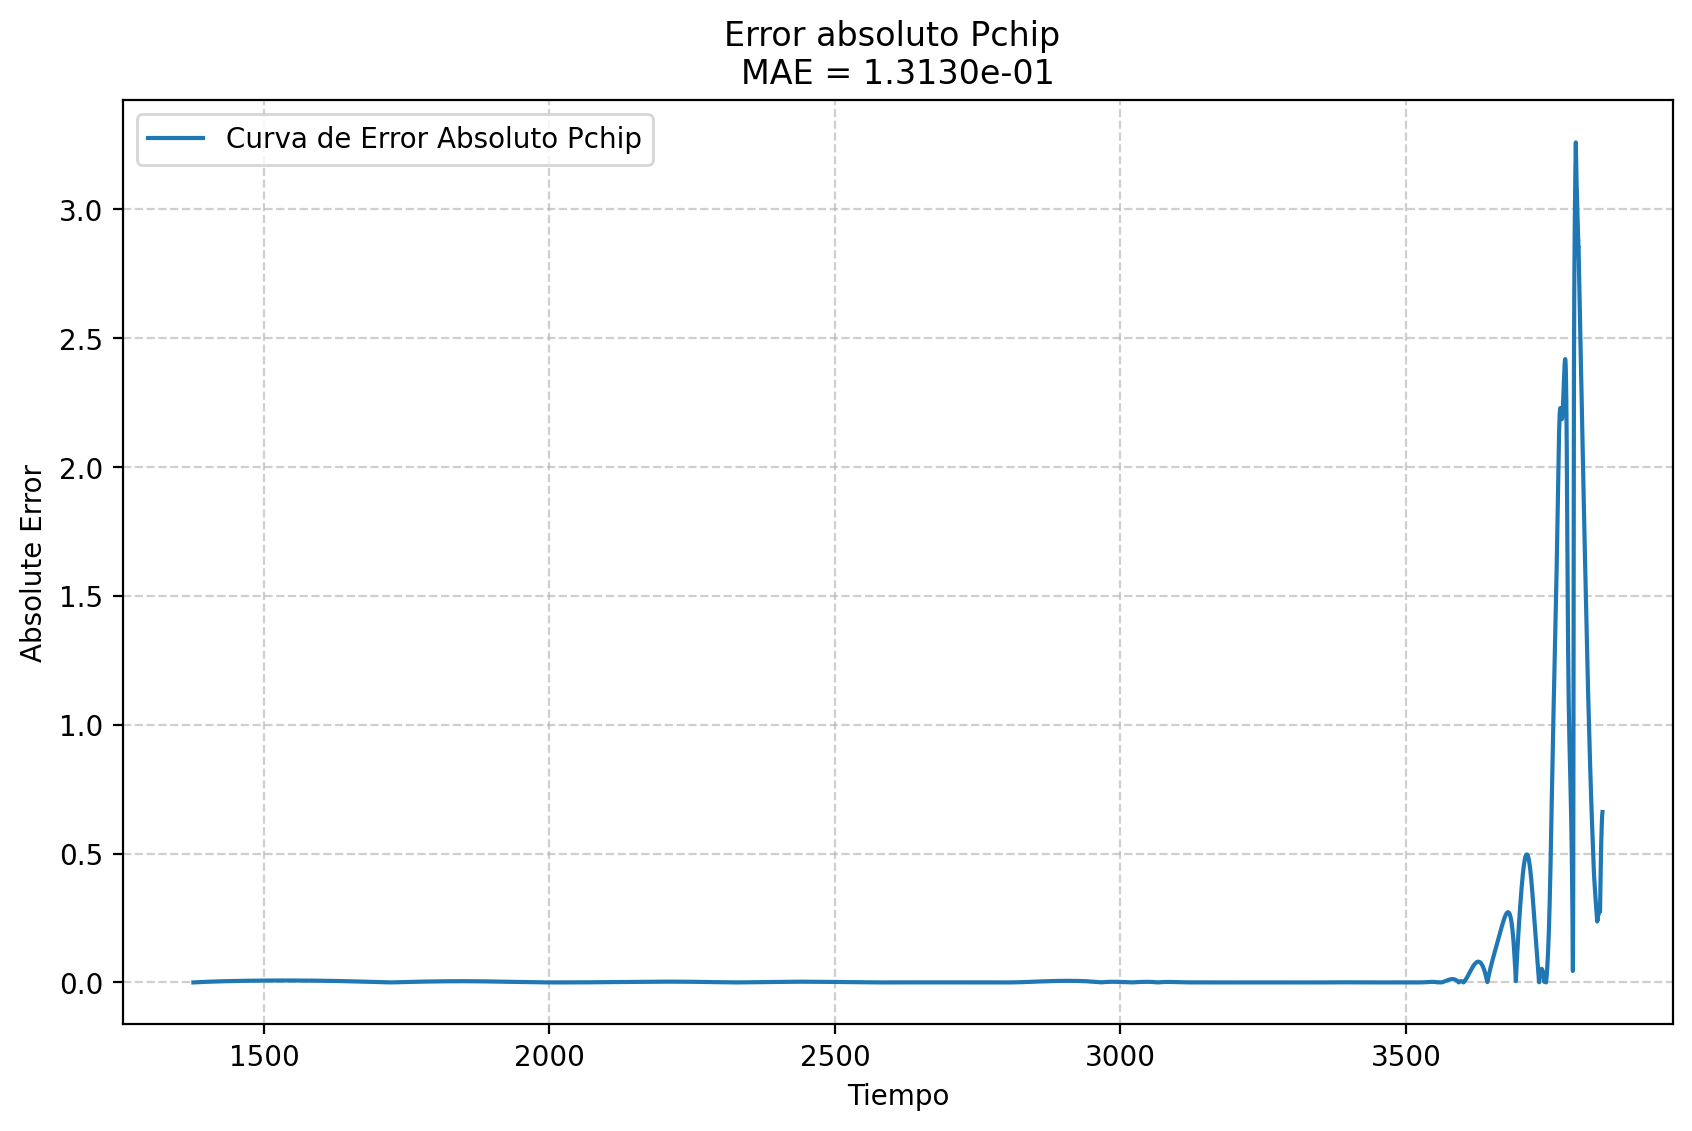

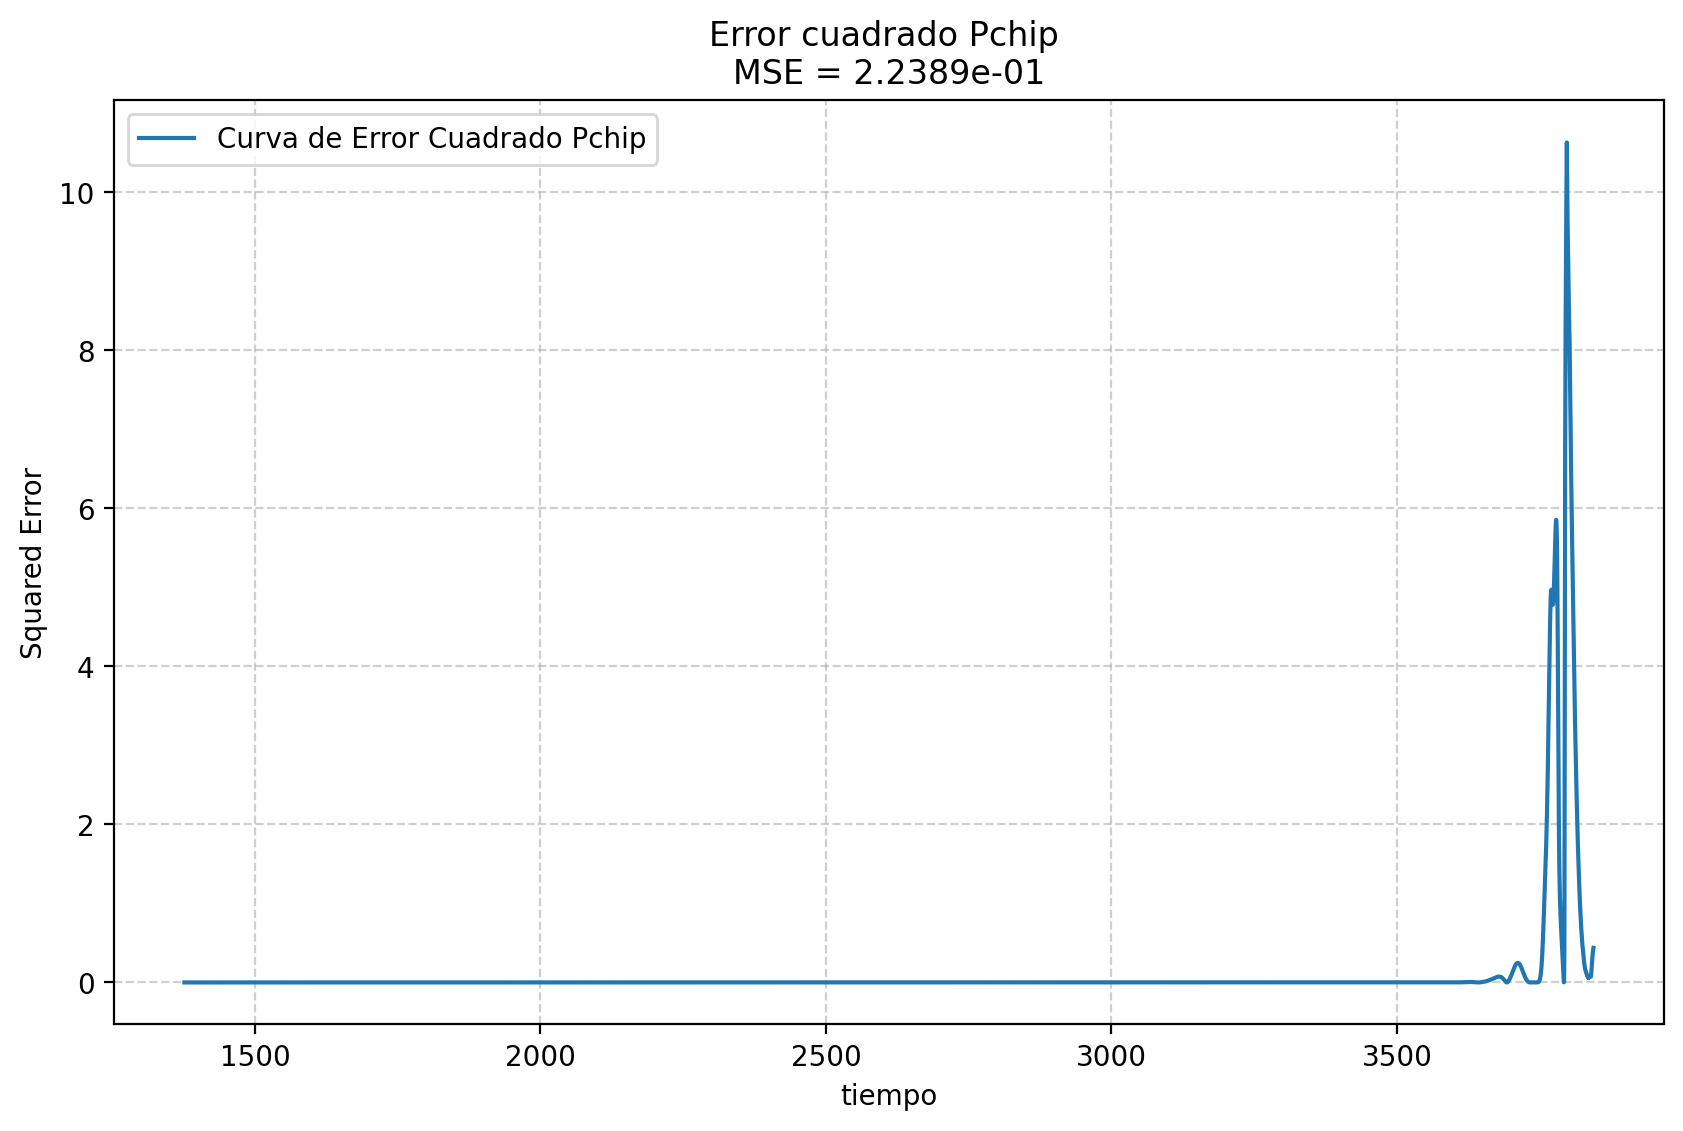

In [80]:
# interpolacion Pchip

pchip = PchipInterpolator(t_entrenamiento, y_entrenamiento)
y_pchip = pchip(t_p)

plt.figure(figsize=(10,6))
plt.plot(t_p, y_p, '-', color='blue', label='Datos reales')
plt.plot(t_entrenamiento,y_entrenamiento, '.',color='green', label='Puntos de entrenamiento')
plt.plot(t_p, y_pchip, '--',color='red', label='Pchip')

# Decoración
plt.title("Interpolacion por Pchip", fontsize=14, fontweight='bold')
plt.xlabel("Tiempo", fontsize=12)
plt.ylabel("Valor", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#error Pchip

absolute_error_pchip = mean_absolute_error(y_pruebas,pchip(t_pruebas))
quared_error_pchip = mean_squared_error(y_pruebas,pchip(t_pruebas))

MAE_pchip = abs(y_pruebas - pchip(t_pruebas))
MSE_pchip = (y_pruebas - pchip(t_pruebas))**2

plt.figure(figsize=(10,6))
plt.plot(t_pruebas, MAE_pchip, label="Curva de Error Absoluto Pchip")
plt.xlabel('Tiempo')
plt.ylabel('Absolute Error')
plt.title(f'Error absoluto Pchip \nMAE = {absolute_error_pchip:.4e}')
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.show()

plt.figure(figsize=(10,6))
plt.plot(t_pruebas, MSE_pchip, label="Curva de Error Cuadrado Pchip")
plt.xlabel('tiempo')
plt.ylabel('Squared Error')
plt.title(f'Error cuadrado Pchip \nMSE = {quared_error_pchip:.4e}')
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.show()


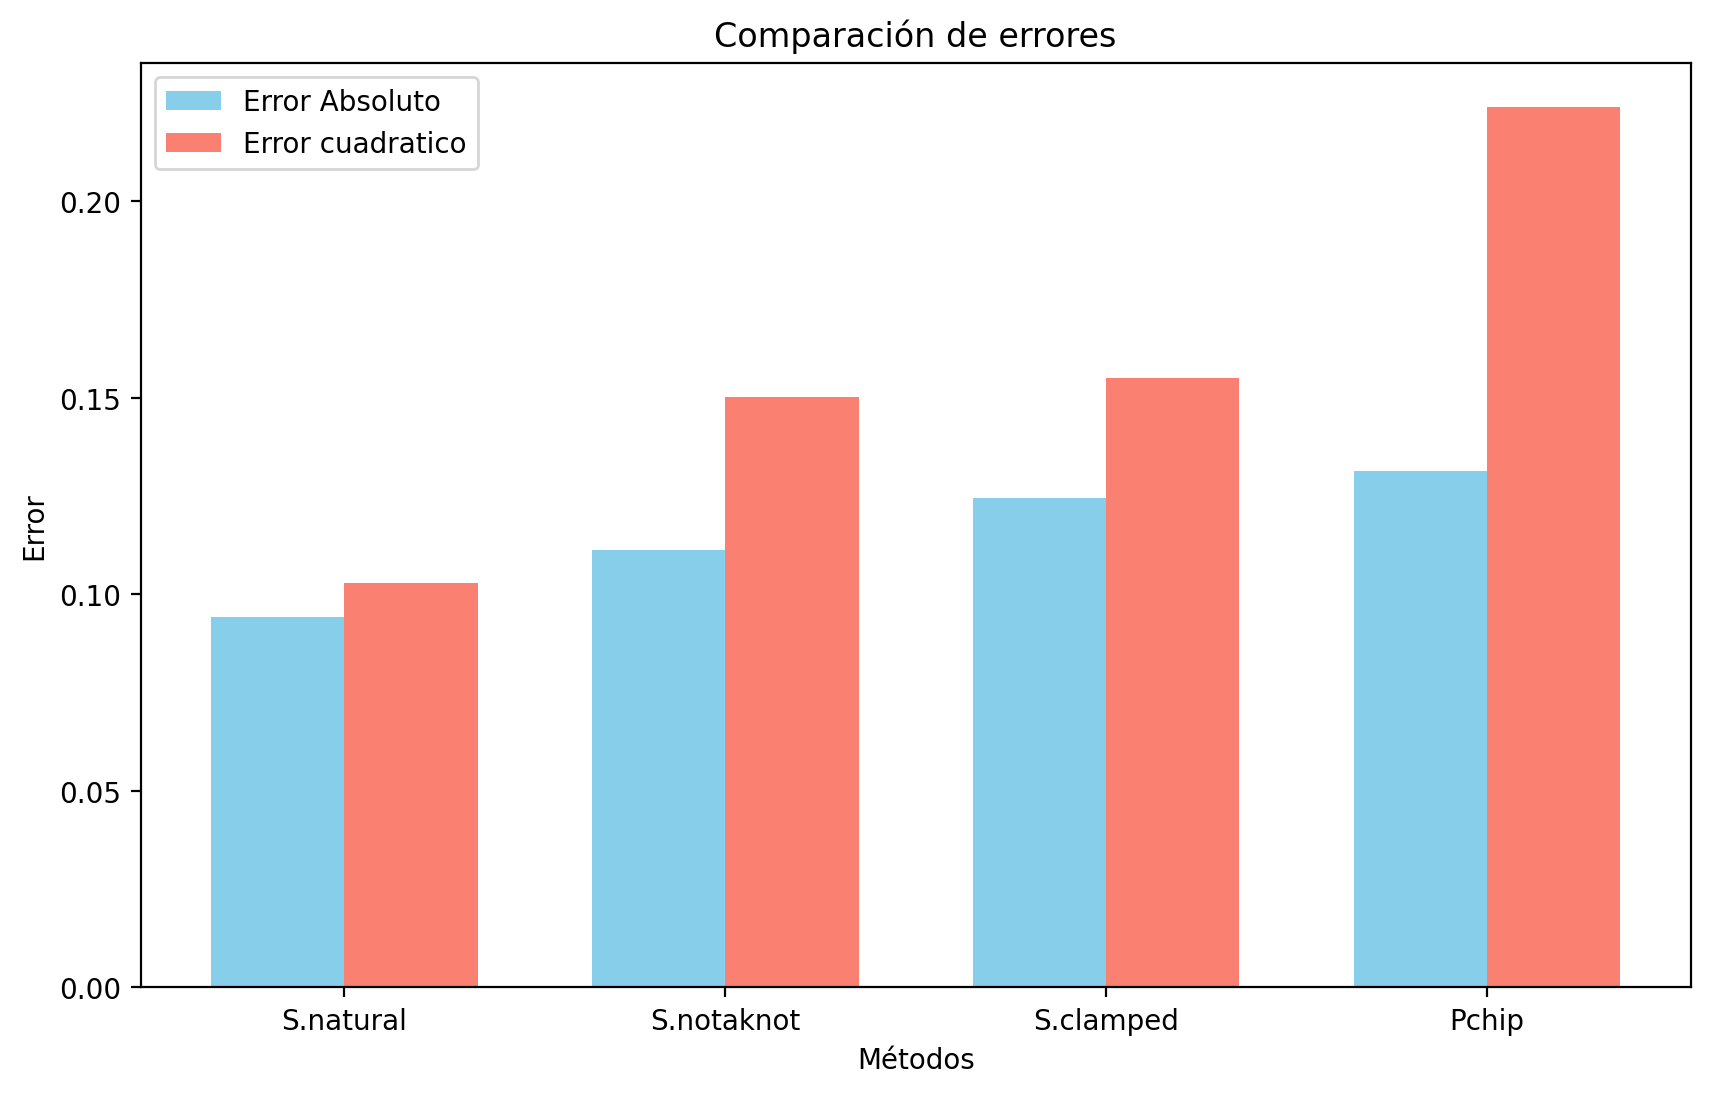

In [95]:
#GRAFICA DE COMPARACION DE ERRORES

Interpolaciones = ['S.natural','S.notaknot', 'S.clamped','Pchip']

#errores abs
absolute_error_natural=mean_absolute_error(y_pruebas,spline_natural(t_pruebas))
absolute_error_notaknot=mean_absolute_error(y_pruebas,spline_notaknot(t_pruebas))
absolute_error_clamped=mean_absolute_error(y_pruebas,spline_clamped(t_pruebas))
absolute_error_pchip=mean_absolute_error(y_pruebas,pchip(t_pruebas))

#errores Cuad

squared_error_natural=mean_squared_error(y_pruebas,spline_natural(t_pruebas))
squared_error_notaknot=mean_squared_error(y_pruebas,spline_notaknot(t_pruebas))
squared_error_clamped=mean_squared_error(y_pruebas,spline_clamped(t_pruebas))
squared_error_pchip=mean_squared_error(y_pruebas,pchip(t_pruebas))

errores_abs = [absolute_error_natural,absolute_error_notaknot,absolute_error_clamped,absolute_error_pchip]
errores_cuad = [squared_error_natural,squared_error_notaknot,squared_error_clamped,squared_error_pchip]

plt.figure(figsize=(10,6))

# Posición de las barras
x = np.arange(len(Interpolaciones))
ancho = 0.35  # ancho de cada barra

plt.bar(x - ancho/2, errores_abs, width=ancho, label="Error Absoluto", color="skyblue")
plt.bar(x + ancho/2, errores_cuad, width=ancho, label="Error cuadratico", color="salmon")

# Etiquetas
plt.xticks(x, Interpolaciones)
plt.xlabel("Métodos")
plt.ylabel("Error")
plt.title("Comparación de errores")
plt.legend()

plt.show()